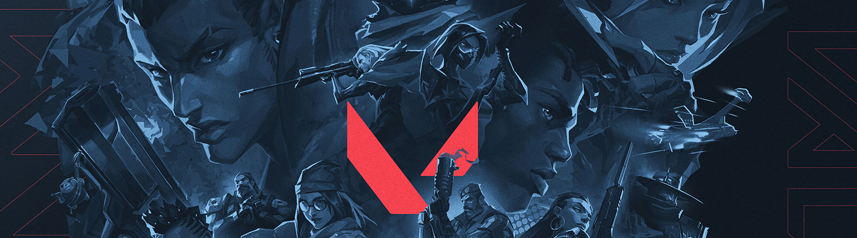

# Esports Analysis: Predicting Outcomes and Recommending Team Compositions for Popular FPS Game Valorant

## Intro:

This project delves into the competitive arena of Valorant's 2023 season, employing a sophisticated blend of predictive modeling, deep learning, and recommendation systems based on comprehensive gameplay data. Through statistical analysis and machine learning, we aim to forecast match wins and devise a system for recommending the most effective agent compositions, enhancing strategic decisions in-game. Leveraging detailed match outcomes, player performances, and agent statistics, our approach seeks to provide insights into the dynamics of victory and the strategic nuances that define the cutting edge in Valorant esports.

## Class Library Imports + Pandas:

In [5]:
import pandas as pd
from GeneralEDA import GeneralEDA
from ChampionTeamsEDA import ChampionTeamsEDA
from WinPredictionModel import WinPredictionModel
from DeepLearning import DeepLearning
from TeamCompositionRecommender import TeamCompositionRecommender

## Data Wrangling (Most done in classes):

In [6]:
data = pd.read_csv('player_stats.csv')

In [7]:
data.head()

,Unnamed: 0,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,...,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
0,0,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,1.19,239,15,11,6,72%,146,16%,1,0
1,1,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.84,234,15,14,6,61%,145,32%,1,4
2,2,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.68,173,10,15,2,67%,123,18%,4,2
3,3,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.63,142,8,15,4,83%,92,29%,3,2
4,4,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.57,114,7,16,8,61%,63,13%,0,1


In [8]:
data_types = data.dtypes
print(data_types)

Unnamed: 0     int64
match_id       int64
game_id        int64
team          object
score_team     int64
opponent      object
score_opp      int64
win_lose      object
map           object
map_pick      object
player_id      int64
player        object
agent         object
rating        object
acs           object
kill           int64
death          int64
assist         int64
kast%         object
adr           object
hs%           object
fk            object
fd            object
dtype: object


In [9]:
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0    0
match_id      0
game_id       0
team          0
score_team    0
opponent      0
score_opp     0
win_lose      0
map           0
map_pick      0
player_id     0
player        0
agent         0
rating        0
acs           0
kill          0
death         0
assist        0
kast%         0
adr           0
hs%           0
fk            0
fd            0
dtype: int64


## EDA:

In [10]:
# General EDA and Champion Teams EDA Class Calls
champions_teams = ['EG', 'PRX', 'LOUD', 'FNC', 'DRX', 'EDG', 'FUT', 'BLG']
eda = GeneralEDA(data)
champion_eda = ChampionTeamsEDA(data, champions_teams)

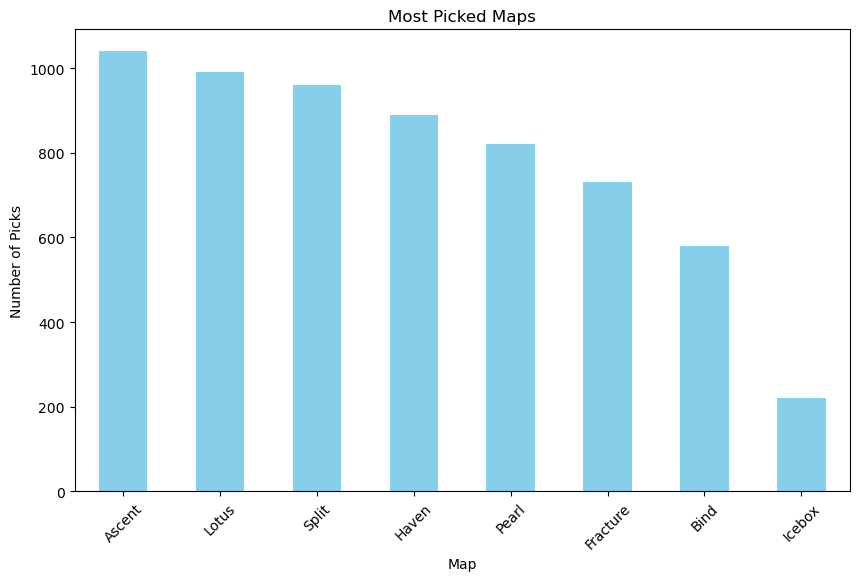

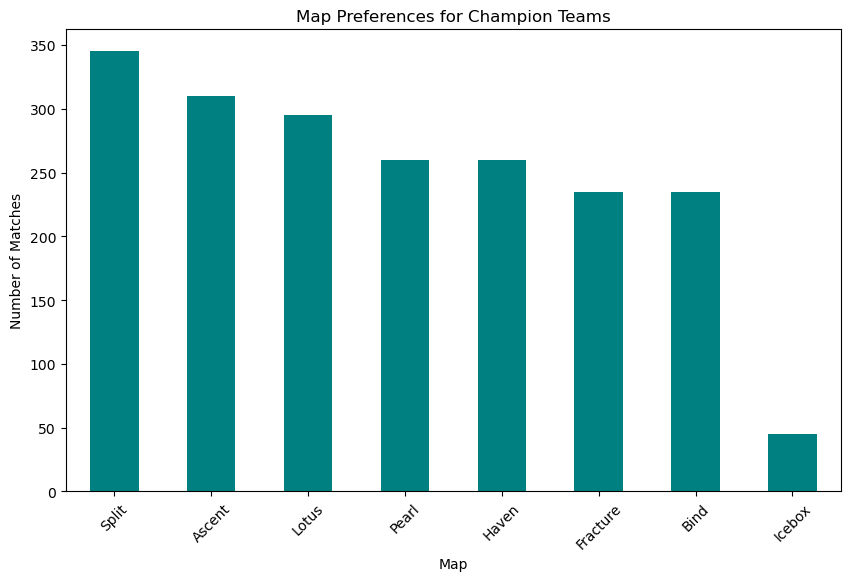

In [11]:
# Most picked maps for every team and champion qualifying teams
eda.most_picked_maps()
champion_eda.map_preferences()

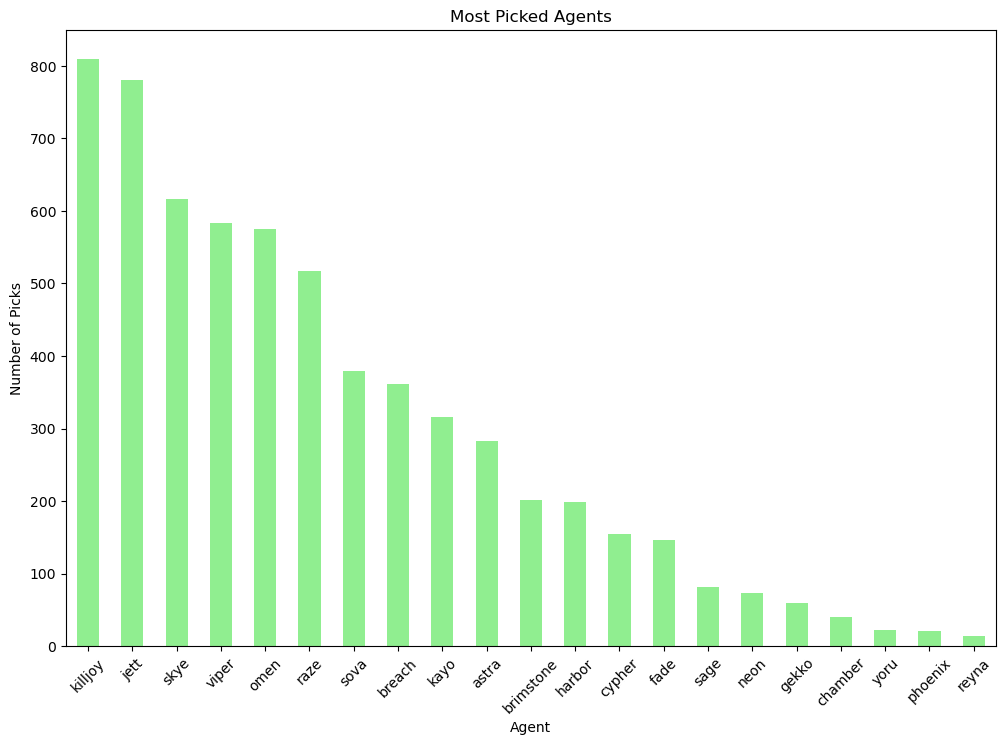

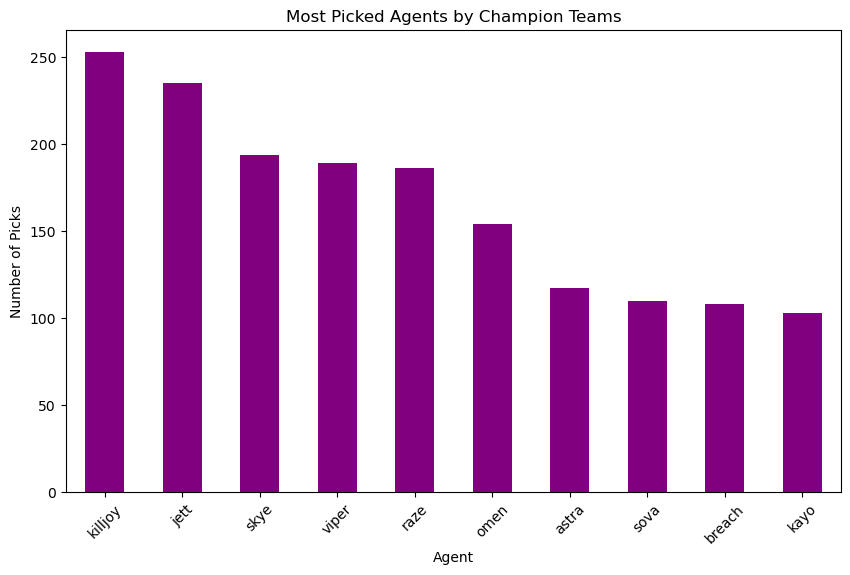

In [12]:
# Most picked characters for both sets of teams
eda.most_picked_agents()
champion_eda.most_picked_agents(top_n=10)

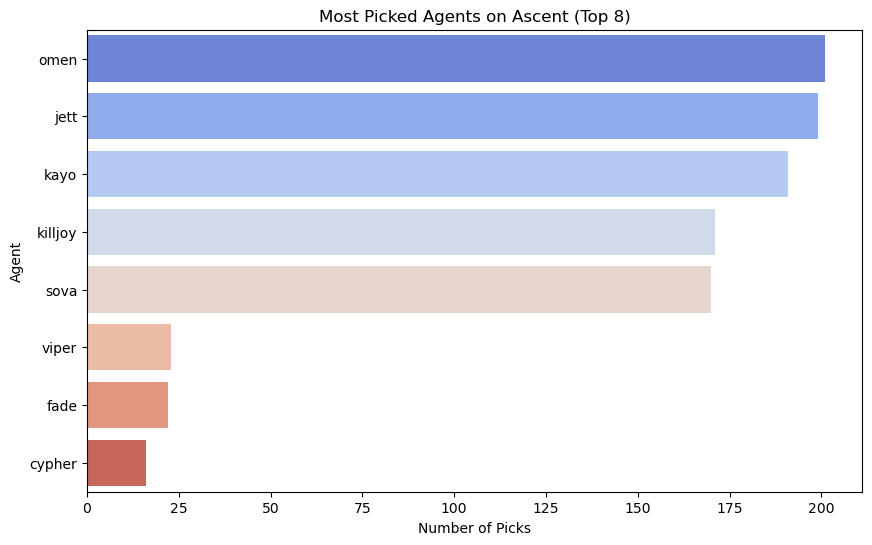

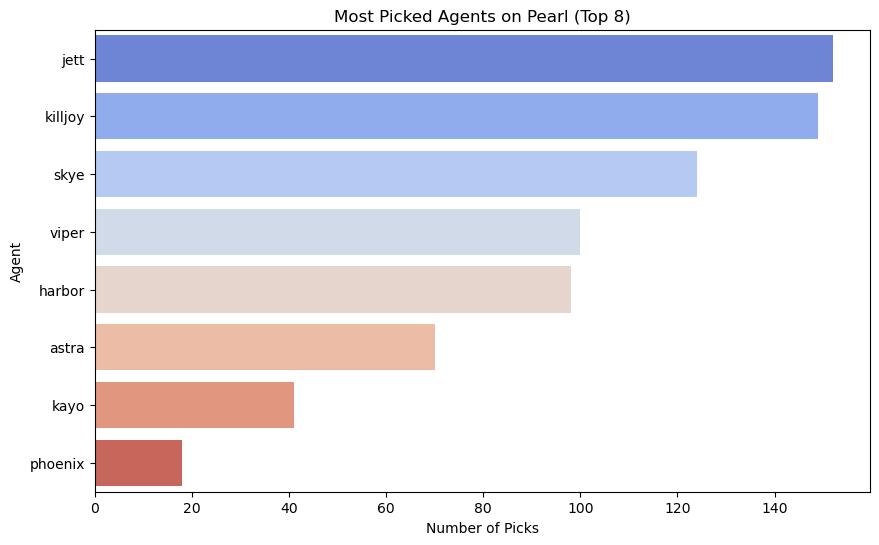

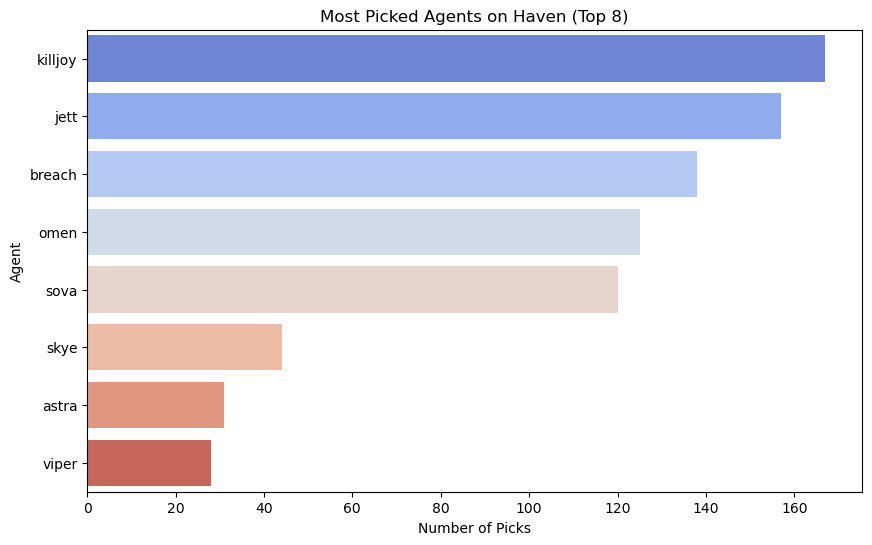

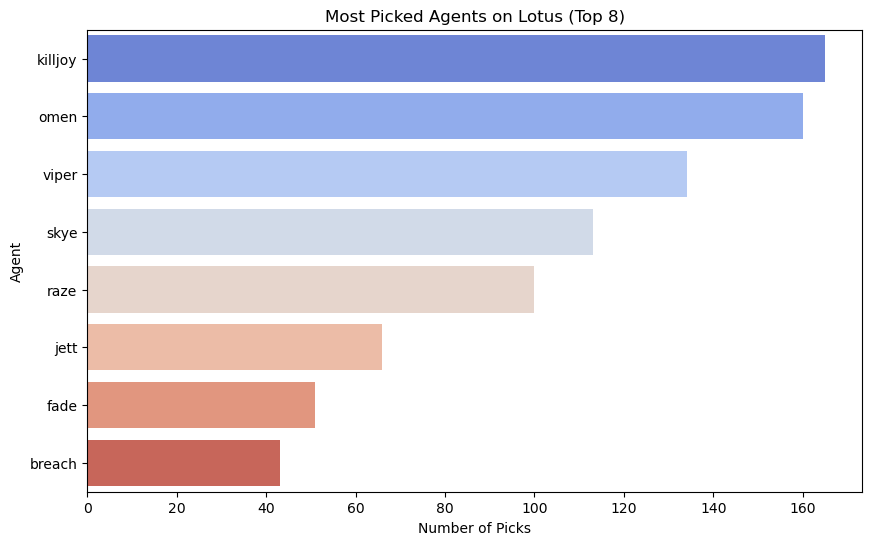

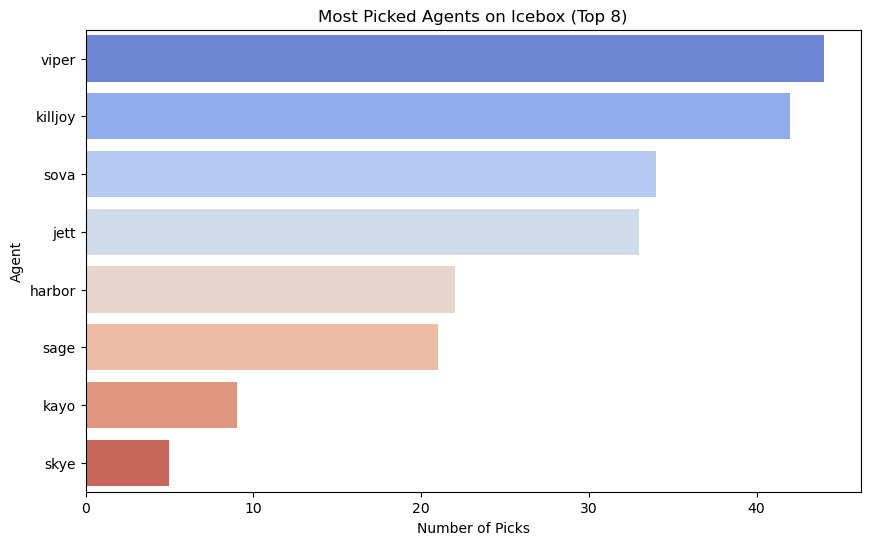

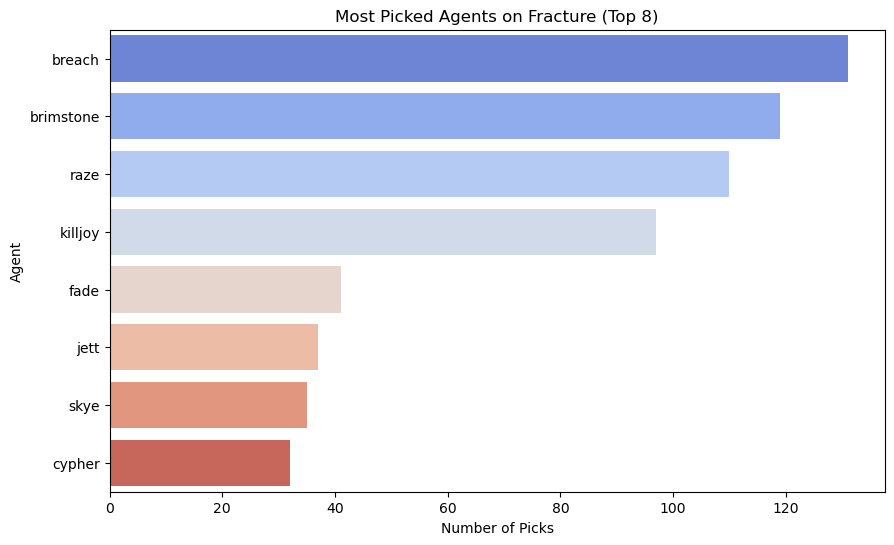

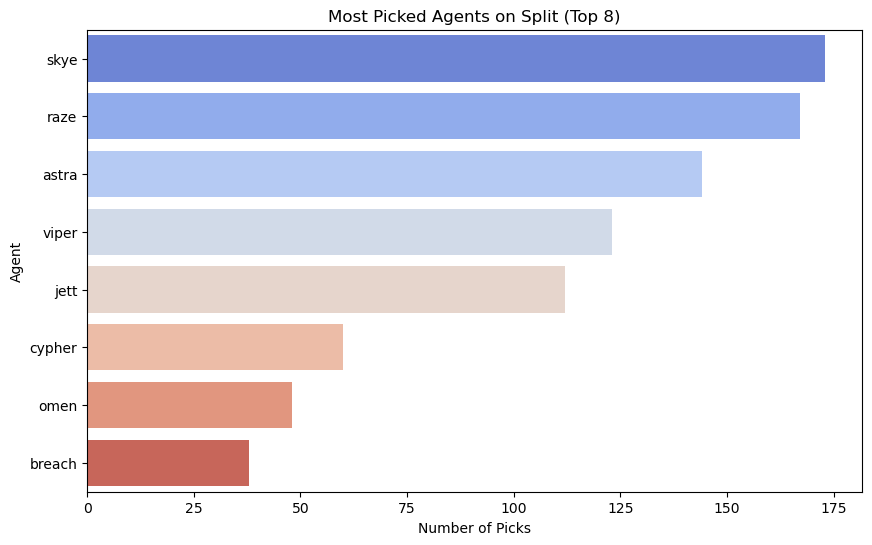

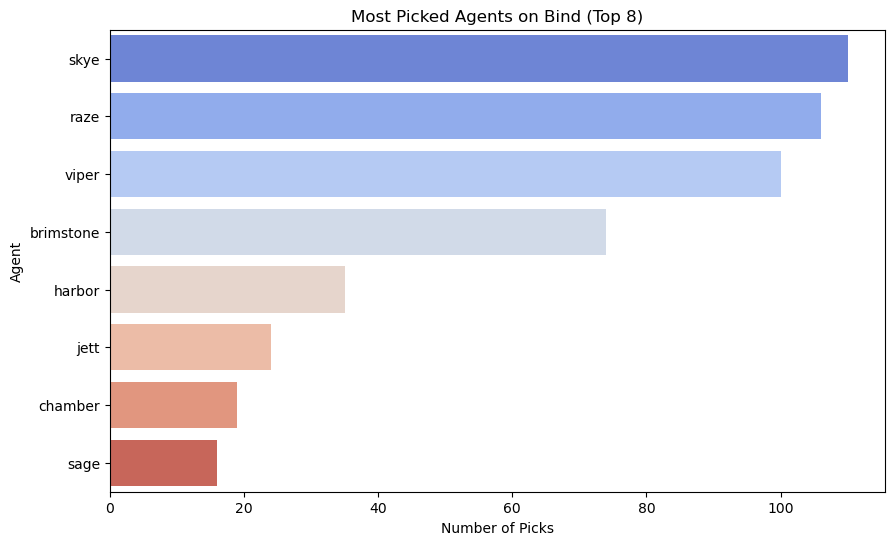

In [13]:
# Most picked characters based on the map for general teams
eda.most_picked_agents_per_map()

Map: Ascent


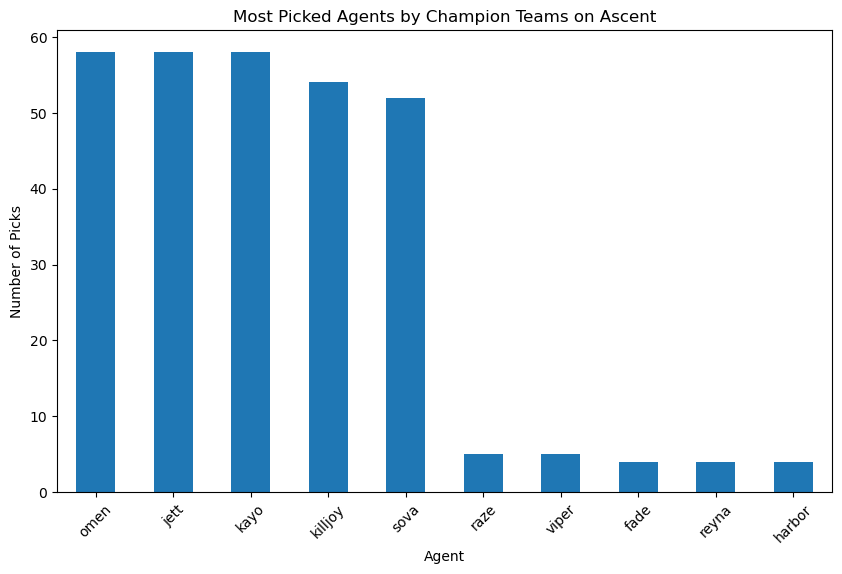

Map: Pearl


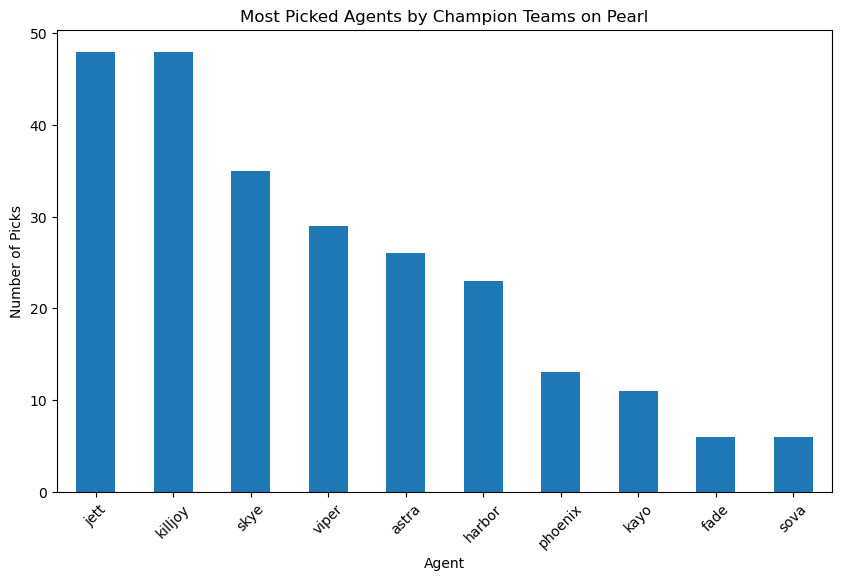

Map: Lotus


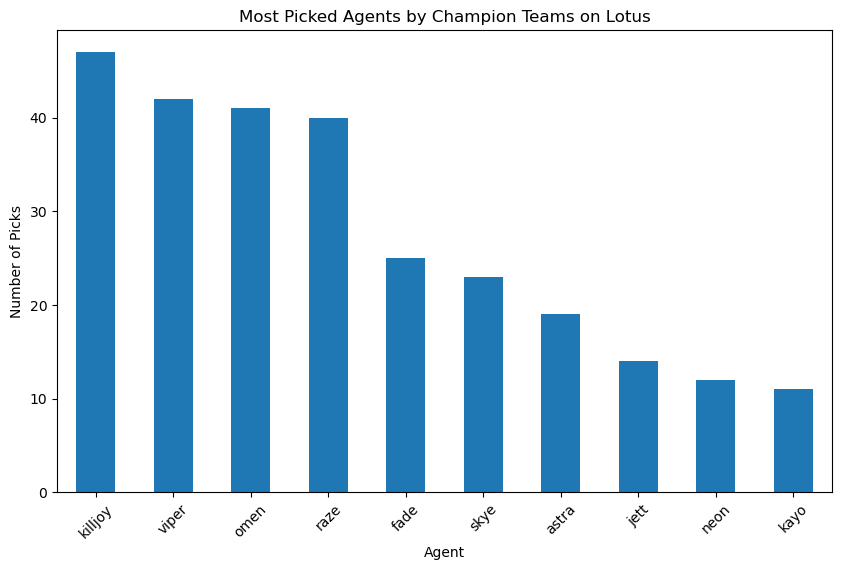

Map: Haven


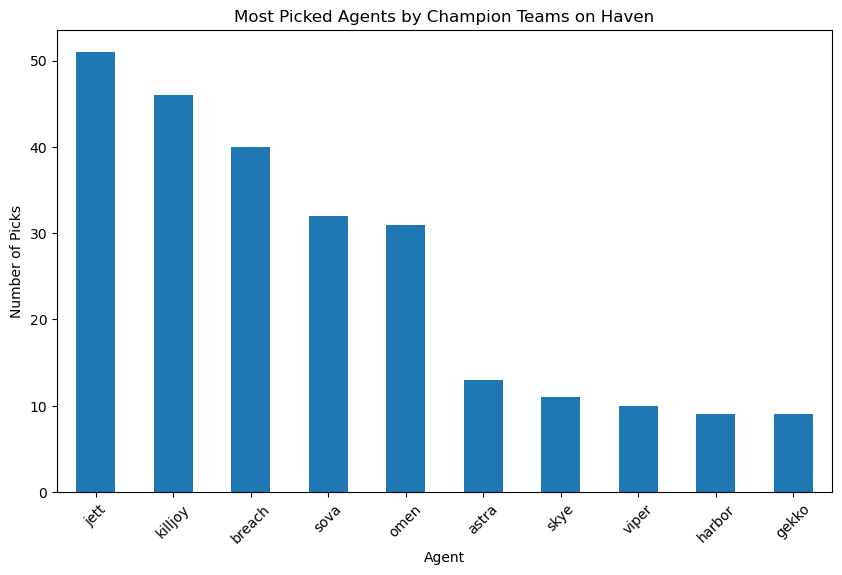

Map: Fracture


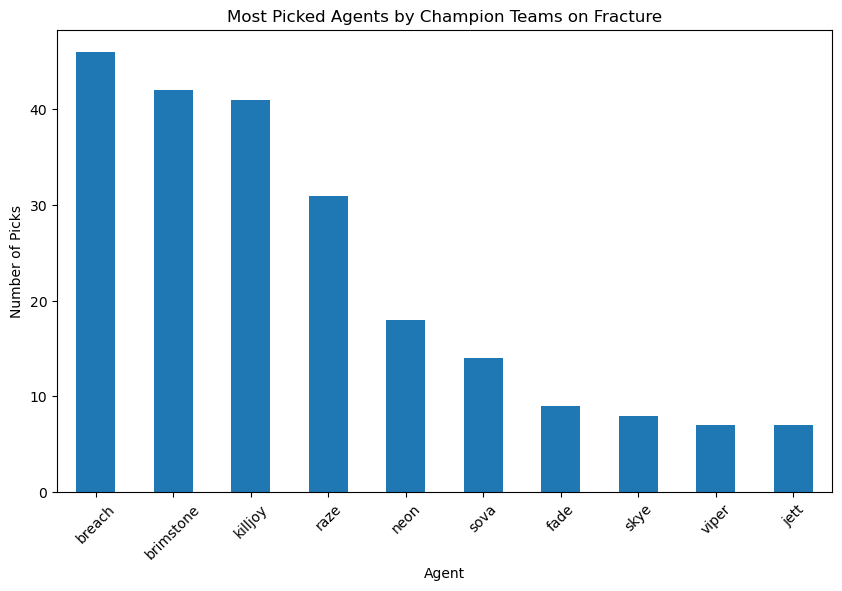

Map: Split


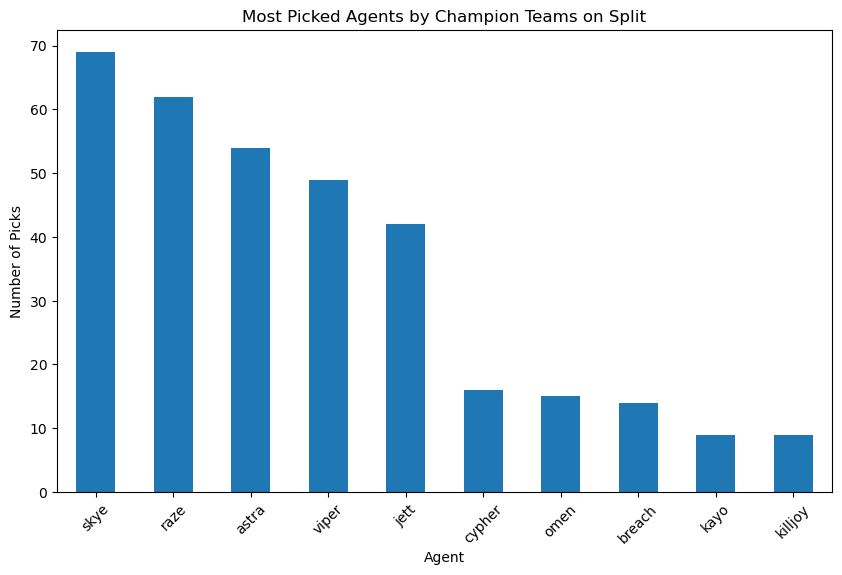

Map: Icebox


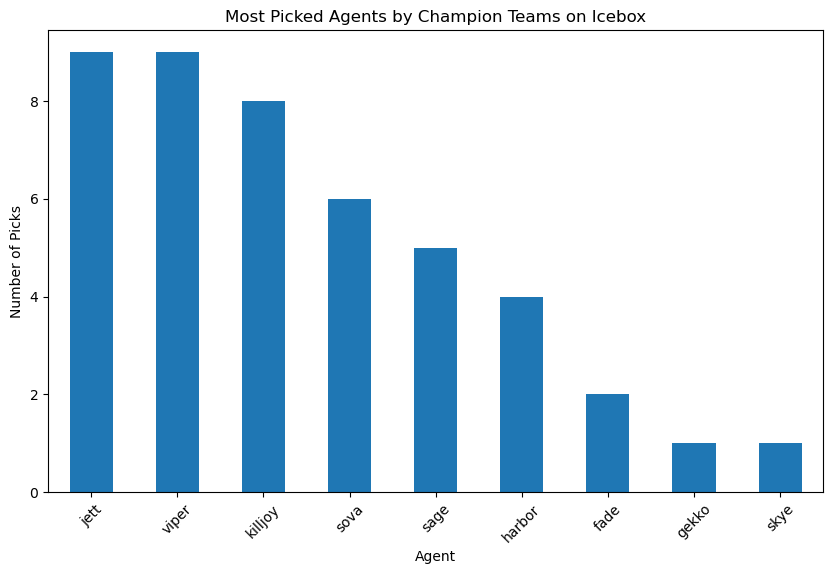

Map: Bind


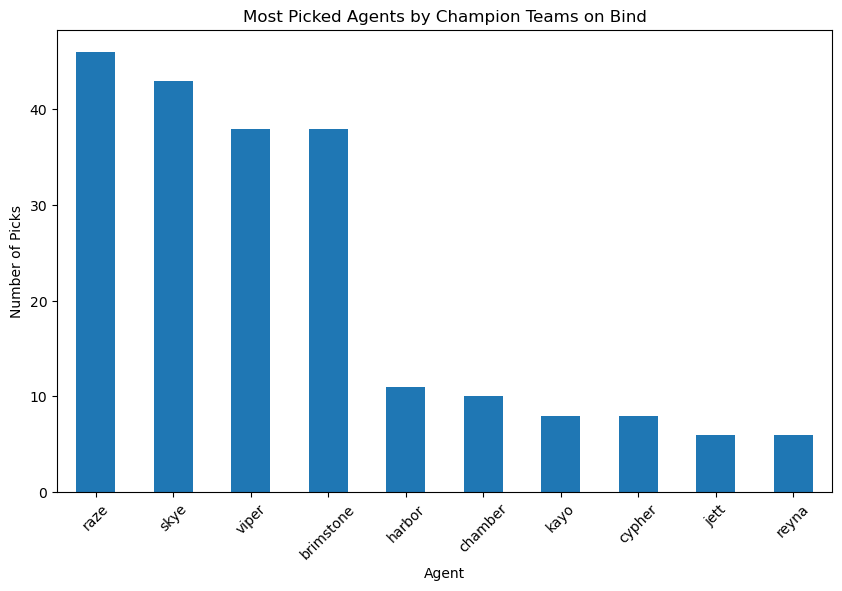

In [14]:
# Most picked characters for champion qualifying teams baseed on the map
champion_eda.most_picked_agents_per_map()

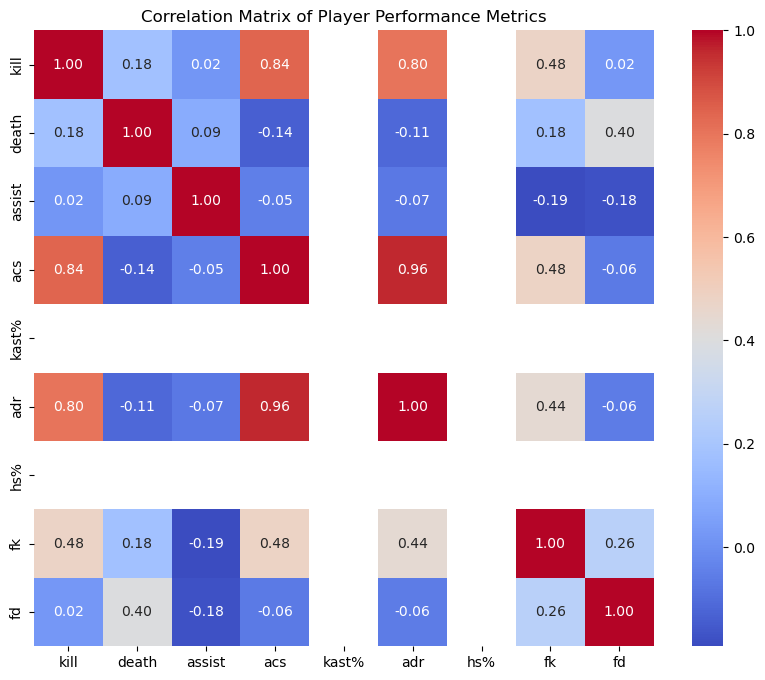

In [15]:
# Correlation matrix of numerical features
eda.correlation_matrix()

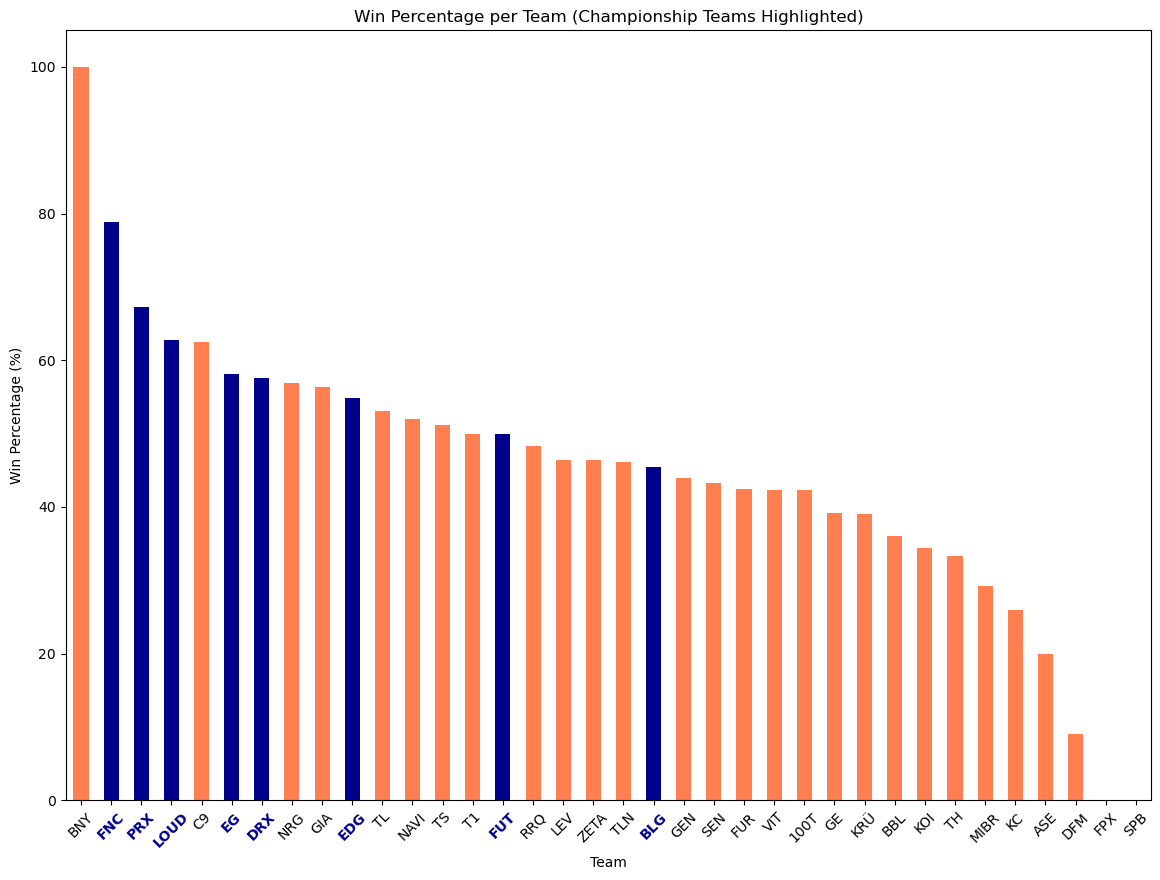

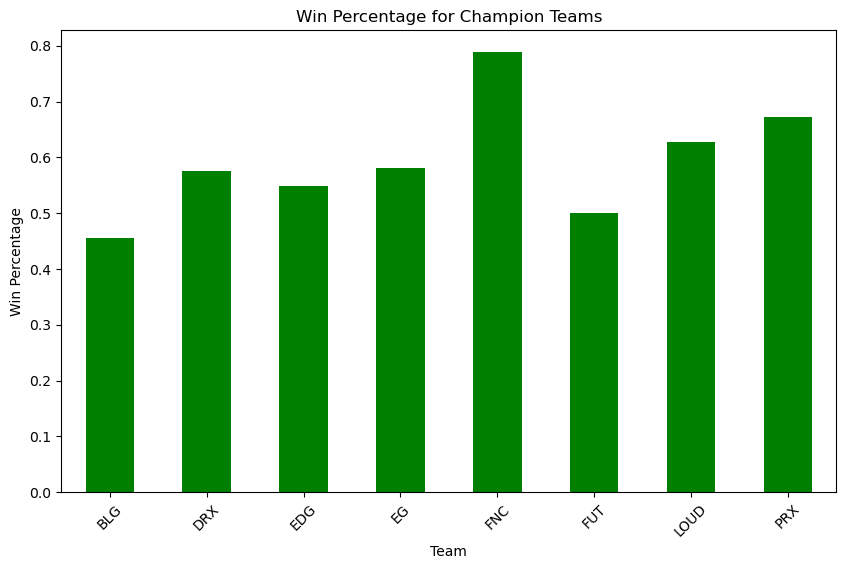

In [16]:
# Win percentages for each set of teams
eda.win_percentage_per_team(champions_teams=champions_teams)
champion_eda.win_percentage_per_team()

## Predictive Modeling

In [17]:
# Calls for predective model analysis class using Random Forest, Gradient Boosting, and Logistic Regression
target_variable = 'win_lose'
features = ['map', 'agent', 'map_pick', 'kill', 'death', 'acs', 'adr', 'assist', 'fk', 'fd']
categorical_features = ['map', 'agent', 'map_pick']
numerical_features = ['kill', 'death', 'acs', 'adr', 'assist', 'fk', 'fd']

In [18]:
# Model instatiation and displaying of results and evaluation metrics
model = WinPredictionModel(data, target_variable, features, categorical_features, numerical_features)
model.train_and_evaluate()
model.display_results()

C:\Users\chill\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Time taken to train and evaluate: 55.07 seconds
Best Model by Accuracy: LogisticRegression with Accuracy: 0.79

Best Model by Precision: LogisticRegression with Precision: 0.79

Best Model by Recall: LogisticRegression with Recall: 0.79

Best Model by ROC AUC: GradientBoosting with ROC AUC: 0.88

Results for RandomForest:
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1 Score : 0.77
ROC AUC: 0.87
Best Parameters:
  classifier__n_estimators: 100
  classifier__min_samples_split: 5
  classifier__max_depth: 20
Feature Importances:
  death: 0.303942856346089
  kill: 0.11578107966118151
  acs: 0.11224329154956805
  adr: 0.10019763593938522
  assist: 0.09423615365545383
  fk: 0.048862706884074326
  fd: 0.04530868075206524
  map_pick_team pick: 0.010181484139489414
  agent_killjoy: 0.009974718445819701
  map_pick_opponent pick: 0.009734145705132483
  map_Lotus: 0.009226622396192798
  map_Ascent: 0.009047493968678991
  map_Haven: 0.008717531550338718
  map_Pearl: 0.008705495245181995
  map_Fractu

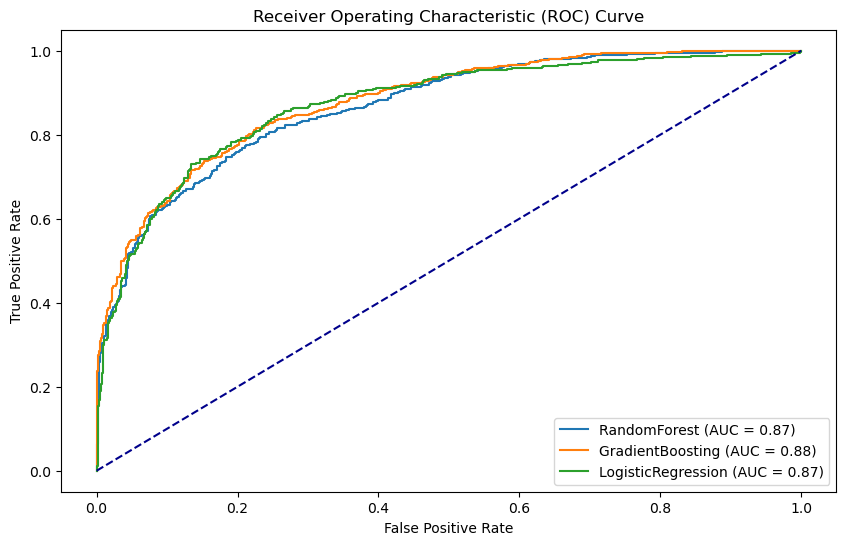

In [19]:
# Visualize ROC-AUC curve for each model and compares them to each other
model.visualize_roc_curves()

## Deep Learning using MLP, LSTM, Simple RNN, and CNN

In [20]:
# Deep Learning Class calls using MLP, LSTM, Simple RNN, and CNN
predictor = DeepLearning(data)
X, y = predictor.preprocess_data()
model_types = ['mlp', 'lstm', 'cnn', 'simple_rnn']

C:\Users\chill\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
# For MLP model
print(f"Cross-validating MLP model...")
history_list_mlp = predictor.cross_validate_general(X, y, epochs=20, n_splits=5, model_type='mlp')

Cross-validating MLP model...

Training on fold 1 with MLP model...
Epoch 1/20


33/33 [==============================] - 1s 9ms/step - loss: 1.5065 - accuracy: 0.5500 - precision: 0.5430 - recall: 0.6308 - val_loss: 1.3342 - val_accuracy: 0.7187 - val_precision: 0.7325 - val_recall: 0.6873
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 1.2975 - accuracy: 0.6163 - precision: 0.6102 - recall: 0.6442 - val_loss: 1.1608 - val_accuracy: 0.7351 - val_precision: 0.7516 - val_recall: 0.7008
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 1.1447 - accuracy: 0.6423 - precision: 0.6341 - recall: 0.6731 - val_loss: 1.0218 - val_accuracy: 0.7495 - val_precision: 0.7643 - val_recall: 0.7201
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 1.0083 - accuracy: 0.7038 - precision: 0.6934 - recall: 0.7308 - val_loss: 0.9130 - val_accuracy: 0.7620 - val_precision: 0.7841 - val_recall: 0.7220
Epoch 5/20
33/33 [========================

65/65 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.8027 - precision_1: 0.8217 - recall_1: 0.7726 - val_loss: 0.5349 - val_accuracy: 0.7620 - val_precision_1: 0.7782 - val_recall_1: 0.7317
Epoch 15/20
65/65 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8075 - precision_1: 0.8268 - recall_1: 0.7775 - val_loss: 0.5336 - val_accuracy: 0.7640 - val_precision_1: 0.7987 - val_recall_1: 0.7046
Epoch 16/20
65/65 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8003 - precision_1: 0.8221 - recall_1: 0.7659 - val_loss: 0.5283 - val_accuracy: 0.7659 - val_precision_1: 0.8076 - val_recall_1: 0.6969
Epoch 17/20
65/65 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.8013 - precision_1: 0.8328 - recall_1: 0.7534 - val_loss: 0.5251 - val_accuracy: 0.7553 - val_precision_1: 0.7727 - val_recall_1: 0.7220
Epoch 18/20
65/65 [==============================] - 0s 2ms/step - loss: 0.4827 - accura

130/130 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7773 - precision_3: 0.8062 - recall_3: 0.7296 - val_loss: 0.4786 - val_accuracy: 0.7938 - val_precision_3: 0.8468 - val_recall_3: 0.7203
Epoch 10/20
130/130 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.7821 - precision_3: 0.8122 - recall_3: 0.7335 - val_loss: 0.4729 - val_accuracy: 0.7996 - val_precision_3: 0.8355 - val_recall_3: 0.7490
Epoch 11/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7865 - precision_3: 0.8156 - recall_3: 0.7398 - val_loss: 0.4724 - val_accuracy: 0.8025 - val_precision_3: 0.8530 - val_recall_3: 0.7337
Epoch 12/20
130/130 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7891 - precision_3: 0.8204 - recall_3: 0.7398 - val_loss: 0.4702 - val_accuracy: 0.7987 - val_precision_3: 0.8366 - val_recall_3: 0.7452
Epoch 13/20
130/130 [==============================] - 0s 2ms/step - loss: 0.497

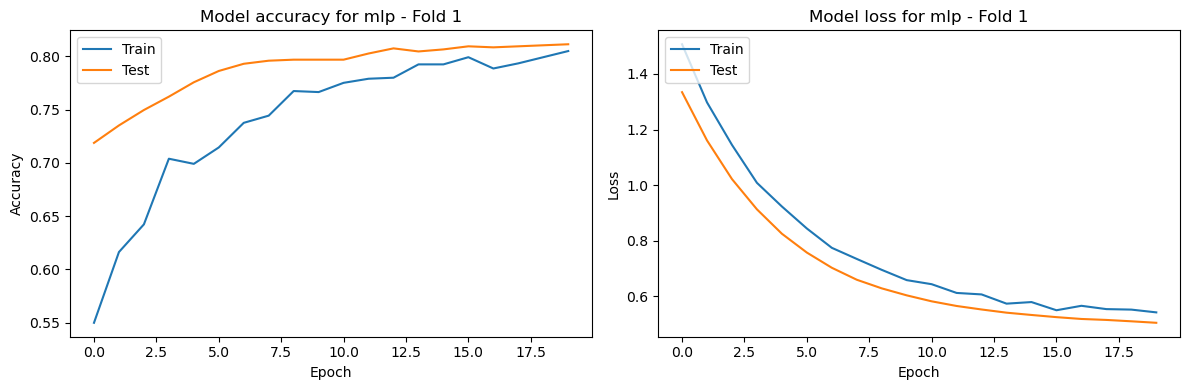

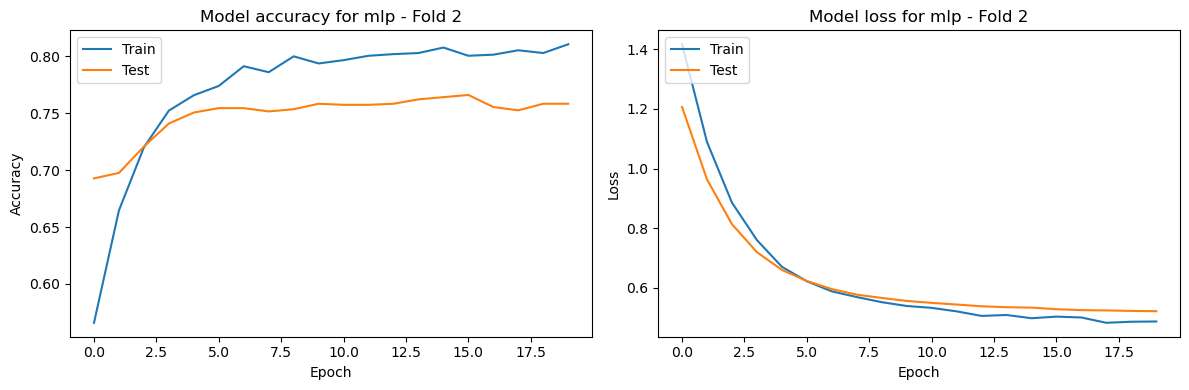

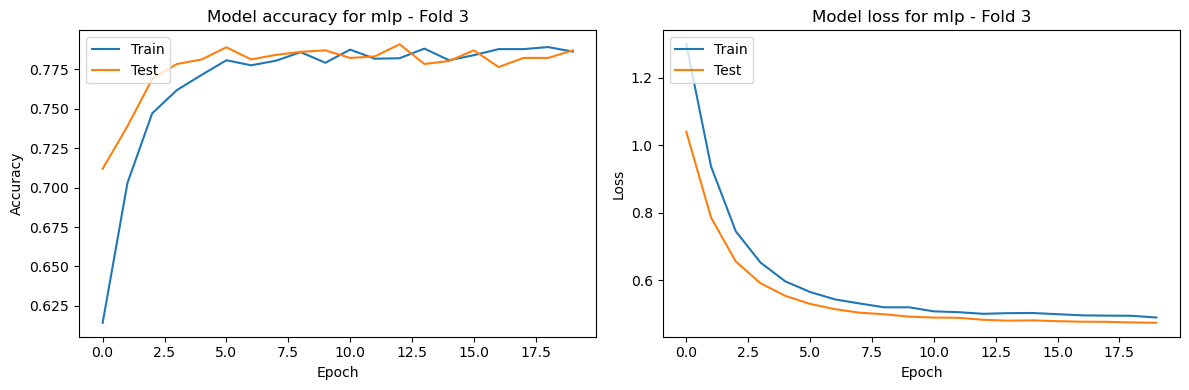

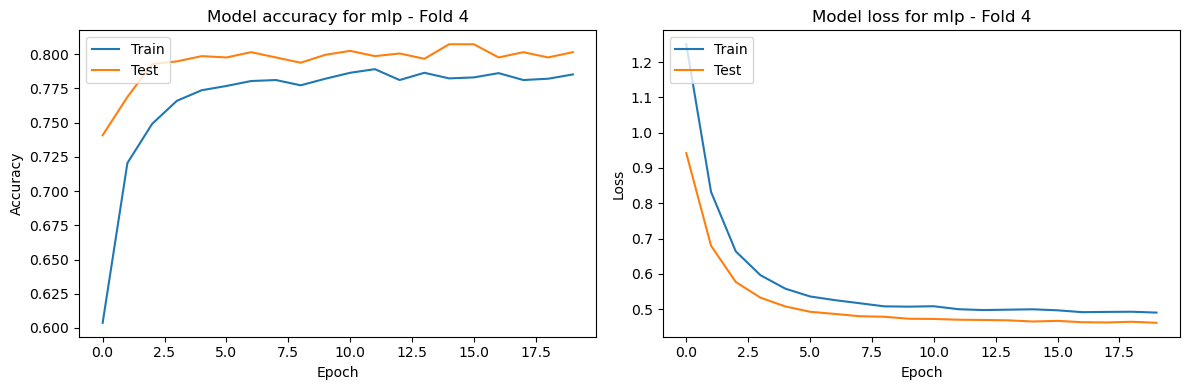

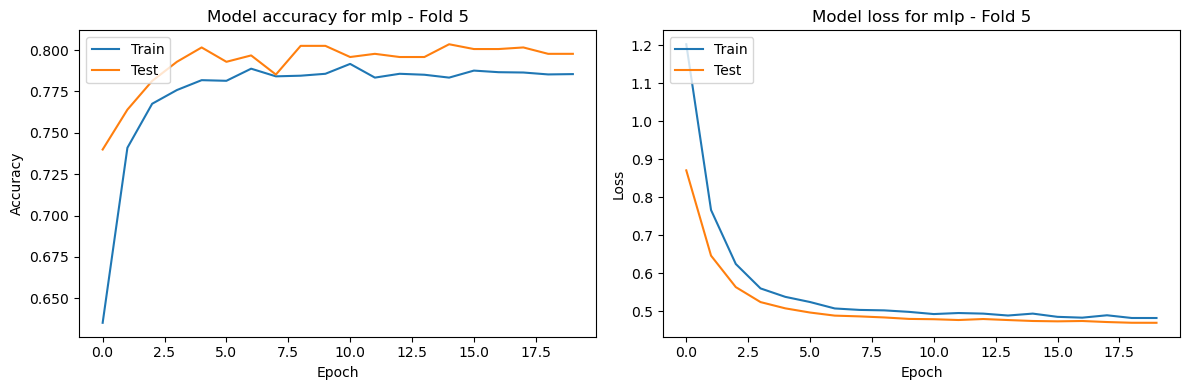

In [22]:
# Visualize the results for MLP model
predictor.visualize_training_results(history_list_mlp, 'mlp')

In [23]:
# For LSTM model
print(f"Cross-validating LSTM model...")
history_list_lstm = predictor.cross_validate_general(X, y, epochs=20, n_splits=5, model_type='lstm')

Cross-validating LSTM model...
Training on fold 1 with LSTM model...
Epoch 1/20
33/33 [==============================] - 6s 53ms/step - loss: 1.3737 - accuracy: 0.4894 - precision_5: 0.4068 - recall_5: 0.0462 - val_loss: 1.1823 - val_accuracy: 0.5010 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/20
33/33 [==============================] - 1s 22ms/step - loss: 1.0606 - accuracy: 0.5154 - precision_5: 0.5179 - recall_5: 0.4442 - val_loss: 0.9501 - val_accuracy: 0.4990 - val_precision_5: 0.4990 - val_recall_5: 1.0000
Epoch 3/20
33/33 [==============================] - 1s 18ms/step - loss: 0.8836 - accuracy: 0.4981 - precision_5: 0.4988 - recall_5: 0.7827 - val_loss: 0.8227 - val_accuracy: 0.5626 - val_precision_5: 0.5440 - val_recall_5: 0.7645
Epoch 4/20
33/33 [==============================] - 1s 19ms/step - loss: 0.7853 - accuracy: 0.5029 - precision_5: 0.5022 - recall_5: 0.6577 - val_loss: 0.7479 - val_accuracy: 0.5636 - val_precision_5: 0.5418 - val_recall_5: 0.8127

Epoch 16/20
65/65 [==============================] - 1s 17ms/step - loss: 0.6848 - accuracy: 0.5736 - precision_6: 0.5671 - recall_6: 0.6185 - val_loss: 0.6895 - val_accuracy: 0.5578 - val_precision_6: 0.5575 - val_recall_6: 0.5521
Epoch 17/20
65/65 [==============================] - 1s 20ms/step - loss: 0.6830 - accuracy: 0.5698 - precision_6: 0.5720 - recall_6: 0.5511 - val_loss: 0.6905 - val_accuracy: 0.5453 - val_precision_6: 0.5401 - val_recall_6: 0.5985
Epoch 18/20
65/65 [==============================] - 1s 19ms/step - loss: 0.6836 - accuracy: 0.5741 - precision_6: 0.5713 - recall_6: 0.5906 - val_loss: 0.6873 - val_accuracy: 0.5453 - val_precision_6: 0.5386 - val_recall_6: 0.6197
Epoch 19/20
65/65 [==============================] - 1s 19ms/step - loss: 0.6800 - accuracy: 0.5746 - precision_6: 0.5835 - recall_6: 0.5183 - val_loss: 0.6902 - val_accuracy: 0.5424 - val_precision_6: 0.5331 - val_recall_6: 0.6680
Epoch 20/20
65/65 [==============================] - 1s 22ms/step - loss

Epoch 11/20
163/163 [==============================] - 3s 16ms/step - loss: 0.6874 - accuracy: 0.5597 - precision_9: 0.5751 - recall_9: 0.4586 - val_loss: 0.6873 - val_accuracy: 0.5559 - val_precision_9: 0.5539 - val_recall_9: 0.5656
Epoch 12/20
163/163 [==============================] - 3s 18ms/step - loss: 0.6866 - accuracy: 0.5628 - precision_9: 0.5636 - recall_9: 0.5576 - val_loss: 0.6869 - val_accuracy: 0.5520 - val_precision_9: 0.5556 - val_recall_9: 0.5116


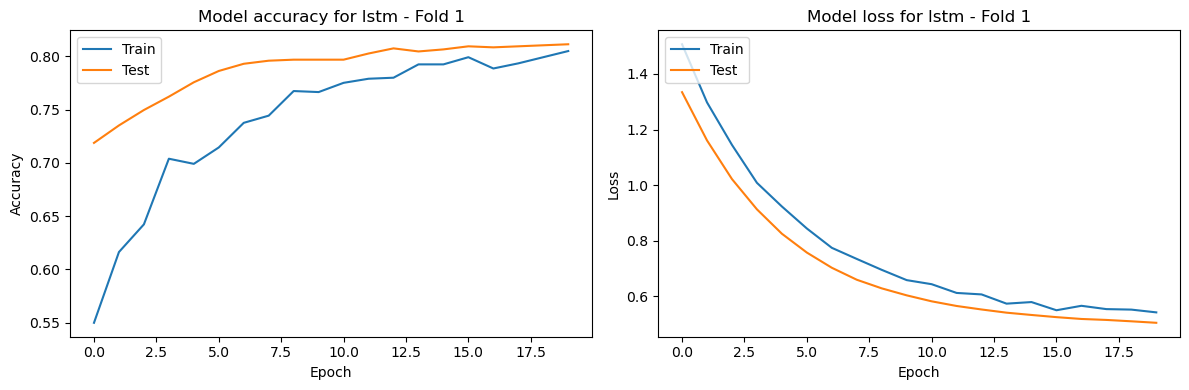

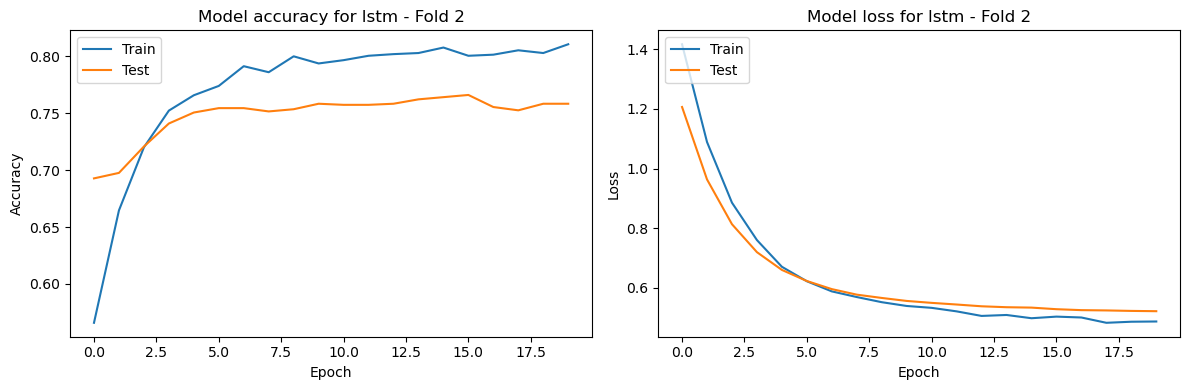

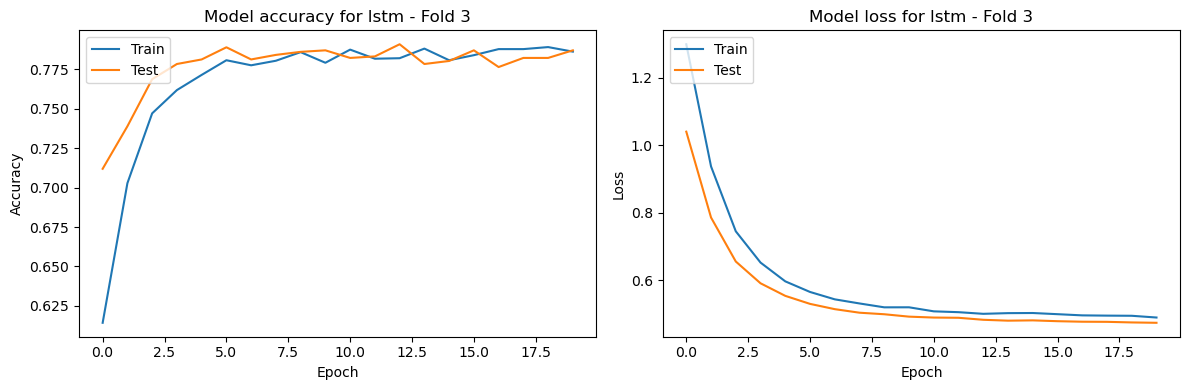

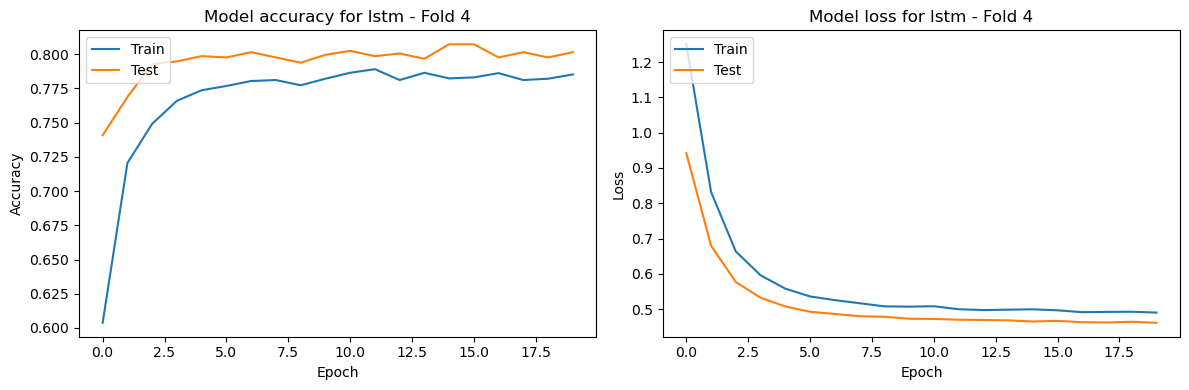

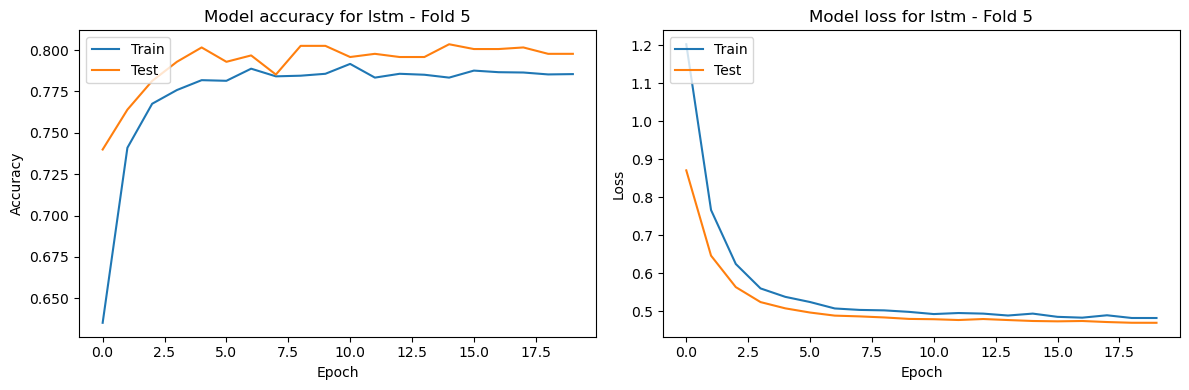

In [24]:
# Visualize the results for LSTM model
predictor.visualize_training_results(history_list_mlp, 'lstm')

In [25]:
# For Simple RNN model
print(f"Cross-validating Simple RNN model...")
history_list_rnn = predictor.cross_validate_general(X, y, epochs=20, n_splits=5, model_type='simple_rnn')

Cross-validating Simple RNN model...
Training on fold 1 with SIMPLE_RNN model...
Epoch 1/20
33/33 [==============================] - 2s 21ms/step - loss: 1.0848 - accuracy: 0.6356 - precision_10: 0.6374 - recall_10: 0.6288 - val_loss: 0.8939 - val_accuracy: 0.7697 - val_precision_10: 0.7841 - val_recall_10: 0.7432
Epoch 2/20
33/33 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.6923 - precision_10: 0.6845 - recall_10: 0.7135 - val_loss: 0.8509 - val_accuracy: 0.7775 - val_precision_10: 0.7876 - val_recall_10: 0.7587
Epoch 3/20
33/33 [==============================] - 0s 10ms/step - loss: 0.9588 - accuracy: 0.6990 - precision_10: 0.7018 - recall_10: 0.6923 - val_loss: 0.8397 - val_accuracy: 0.7601 - val_precision_10: 0.7796 - val_recall_10: 0.7239
Epoch 4/20
33/33 [==============================] - 0s 11ms/step - loss: 0.8752 - accuracy: 0.7288 - precision_10: 0.7228 - recall_10: 0.7423 - val_loss: 0.7849 - val_accuracy: 0.7775 - val_precision_10: 0.8113 - v

65/65 [==============================] - 1s 9ms/step - loss: 0.4970 - accuracy: 0.7830 - precision_11: 0.7932 - recall_11: 0.7649 - val_loss: 0.5134 - val_accuracy: 0.7534 - val_precision_11: 0.7500 - val_recall_11: 0.7587
Epoch 16/20
65/65 [==============================] - 1s 8ms/step - loss: 0.4790 - accuracy: 0.7936 - precision_11: 0.8030 - recall_11: 0.7775 - val_loss: 0.5241 - val_accuracy: 0.7505 - val_precision_11: 0.7659 - val_recall_11: 0.7201
Epoch 17/20
65/65 [==============================] - 0s 8ms/step - loss: 0.4843 - accuracy: 0.7849 - precision_11: 0.7906 - recall_11: 0.7746 - val_loss: 0.5202 - val_accuracy: 0.7563 - val_precision_11: 0.7874 - val_recall_11: 0.7008
Epoch 18/20
65/65 [==============================] - 0s 8ms/step - loss: 0.4829 - accuracy: 0.7830 - precision_11: 0.7903 - recall_11: 0.7697 - val_loss: 0.5449 - val_accuracy: 0.7418 - val_precision_11: 0.7976 - val_recall_11: 0.6467
Epoch 19/20
65/65 [==============================] - 1s 8ms/step - loss:

130/130 [==============================] - 1s 9ms/step - loss: 0.5086 - accuracy: 0.7725 - precision_13: 0.7909 - recall_13: 0.7402 - val_loss: 0.4754 - val_accuracy: 0.7794 - val_precision_13: 0.8292 - val_recall_13: 0.7069
Epoch 10/20
130/130 [==============================] - 1s 9ms/step - loss: 0.5044 - accuracy: 0.7653 - precision_13: 0.7789 - recall_13: 0.7402 - val_loss: 0.5055 - val_accuracy: 0.7534 - val_precision_13: 0.7529 - val_recall_13: 0.7586
Epoch 11/20
130/130 [==============================] - 1s 10ms/step - loss: 0.4950 - accuracy: 0.7754 - precision_13: 0.7971 - recall_13: 0.7383 - val_loss: 0.5044 - val_accuracy: 0.7611 - val_precision_13: 0.8100 - val_recall_13: 0.6858
Epoch 12/20
130/130 [==============================] - 1s 9ms/step - loss: 0.4944 - accuracy: 0.7689 - precision_13: 0.7858 - recall_13: 0.7388 - val_loss: 0.4722 - val_accuracy: 0.7842 - val_precision_13: 0.8028 - val_recall_13: 0.7567
Epoch 13/20
130/130 [==============================] - 1s 10ms/

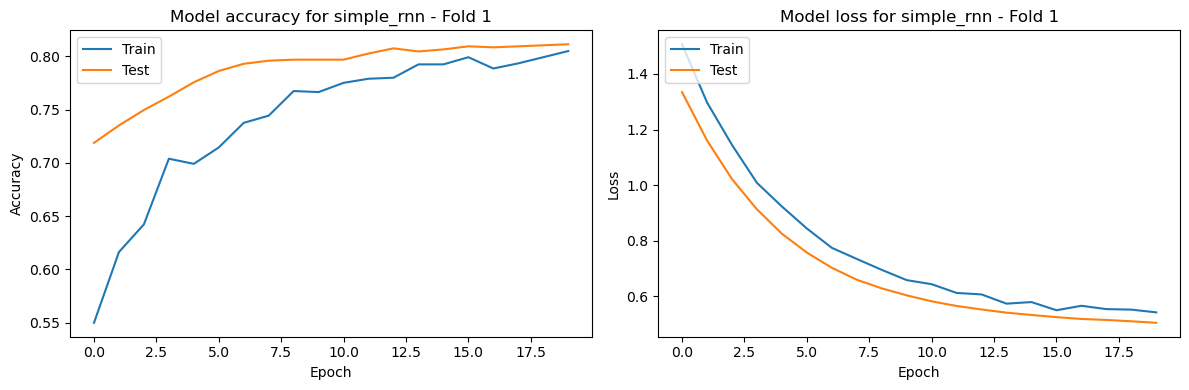

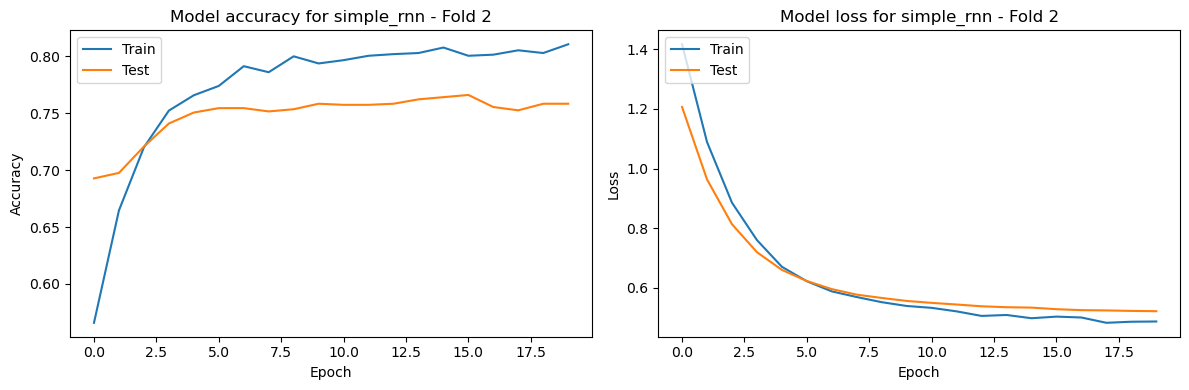

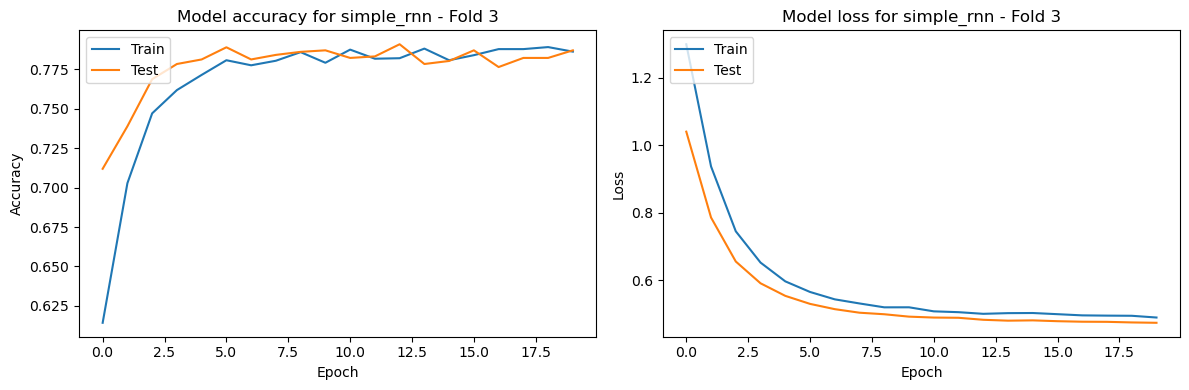

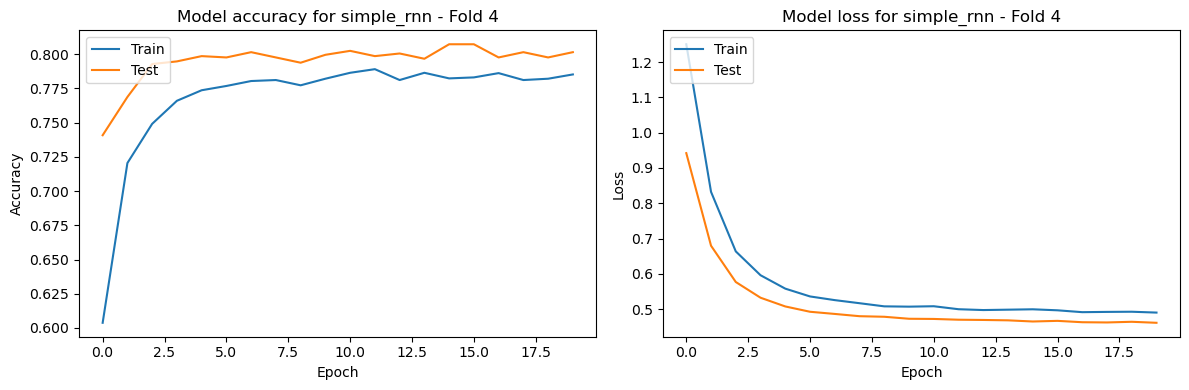

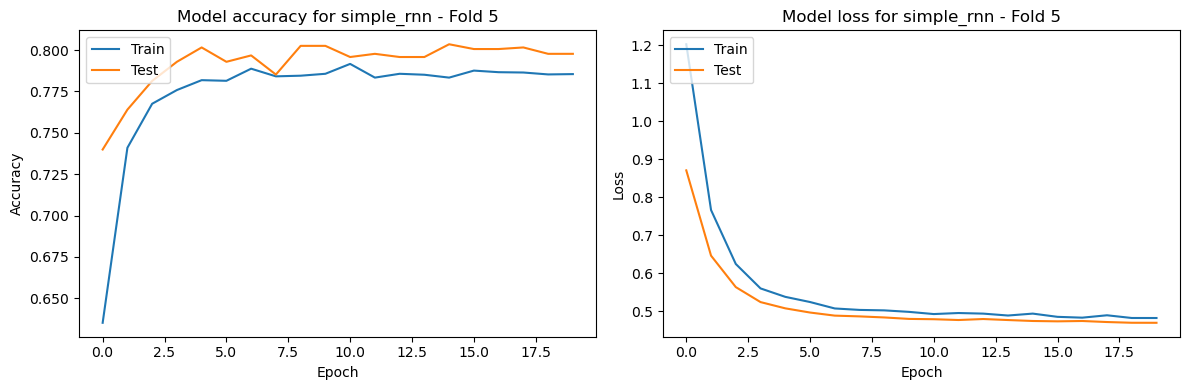

In [26]:
# Visualize the results for Simple RNN model
predictor.visualize_training_results(history_list_mlp, 'simple_rnn')

In [27]:
# For CNN model
print(f"Cross-validating CNN model...")
history_list_cnn = predictor.cross_validate_general(X, y, epochs=20, n_splits=5, model_type='cnn')

Cross-validating CNN model...

Training on fold 1 with CNN model...
Epoch 1/20
33/33 [==============================] - 1s 13ms/step - loss: 1.7765 - accuracy: 0.5490 - precision_15: 0.5377 - recall_15: 0.7000 - val_loss: 1.4181 - val_accuracy: 0.6484 - val_precision_15: 0.6038 - val_recall_15: 0.8591
Epoch 2/20
33/33 [==============================] - 0s 5ms/step - loss: 1.2078 - accuracy: 0.6096 - precision_15: 0.5969 - recall_15: 0.6750 - val_loss: 1.0169 - val_accuracy: 0.6927 - val_precision_15: 0.6860 - val_recall_15: 0.7085
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.9174 - accuracy: 0.6606 - precision_15: 0.6590 - recall_15: 0.6654 - val_loss: 0.8104 - val_accuracy: 0.6975 - val_precision_15: 0.6717 - val_recall_15: 0.7703
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.7650 - accuracy: 0.6904 - precision_15: 0.6854 - recall_15: 0.7038 - val_loss: 0.7052 - val_accuracy: 0.7100 - val_precision_15: 0.8945 - val_recall_15: 0.

Epoch 15/20
65/65 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7642 - precision_16: 0.8004 - recall_16: 0.7033 - val_loss: 0.6216 - val_accuracy: 0.7235 - val_precision_16: 0.8942 - val_recall_16: 0.5058
Epoch 16/20
65/65 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7700 - precision_16: 0.8118 - recall_16: 0.7023 - val_loss: 0.6108 - val_accuracy: 0.7206 - val_precision_16: 0.8000 - val_recall_16: 0.5869
Epoch 17/20
65/65 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7647 - precision_16: 0.7993 - recall_16: 0.7062 - val_loss: 0.6049 - val_accuracy: 0.7033 - val_precision_16: 0.7169 - val_recall_16: 0.6699
Epoch 18/20
65/65 [==============================] - 0s 4ms/step - loss: 0.5567 - accuracy: 0.7656 - precision_16: 0.8011 - recall_16: 0.7062 - val_loss: 0.6107 - val_accuracy: 0.7187 - val_precision_16: 0.7783 - val_recall_16: 0.6100
Epoch 19/20
65/65 [==============================] - 0s 6ms/

130/130 [==============================] - 1s 4ms/step - loss: 0.5837 - accuracy: 0.7364 - precision_18: 0.7829 - recall_18: 0.6535 - val_loss: 0.5588 - val_accuracy: 0.7486 - val_precision_18: 0.7736 - val_recall_18: 0.7069
Epoch 10/20
130/130 [==============================] - 1s 5ms/step - loss: 0.5680 - accuracy: 0.7513 - precision_18: 0.7964 - recall_18: 0.6747 - val_loss: 0.5550 - val_accuracy: 0.7495 - val_precision_18: 0.7718 - val_recall_18: 0.7126
Epoch 11/20
130/130 [==============================] - 1s 4ms/step - loss: 0.5693 - accuracy: 0.7511 - precision_18: 0.7890 - recall_18: 0.6848 - val_loss: 0.5551 - val_accuracy: 0.7592 - val_precision_18: 0.8091 - val_recall_18: 0.6820
Epoch 12/20
130/130 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.7477 - precision_18: 0.7820 - recall_18: 0.6863 - val_loss: 0.5550 - val_accuracy: 0.7582 - val_precision_18: 0.8483 - val_recall_18: 0.6322
Epoch 13/20
130/130 [==============================] - 0s 3ms/st

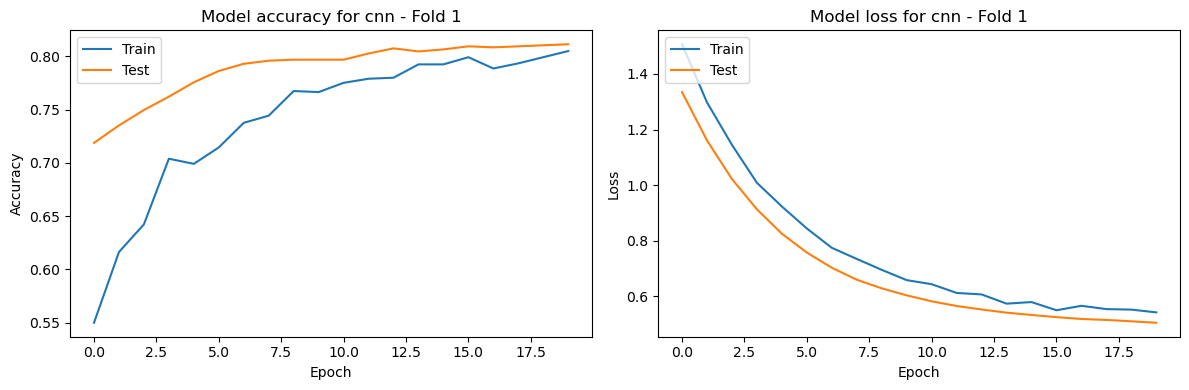

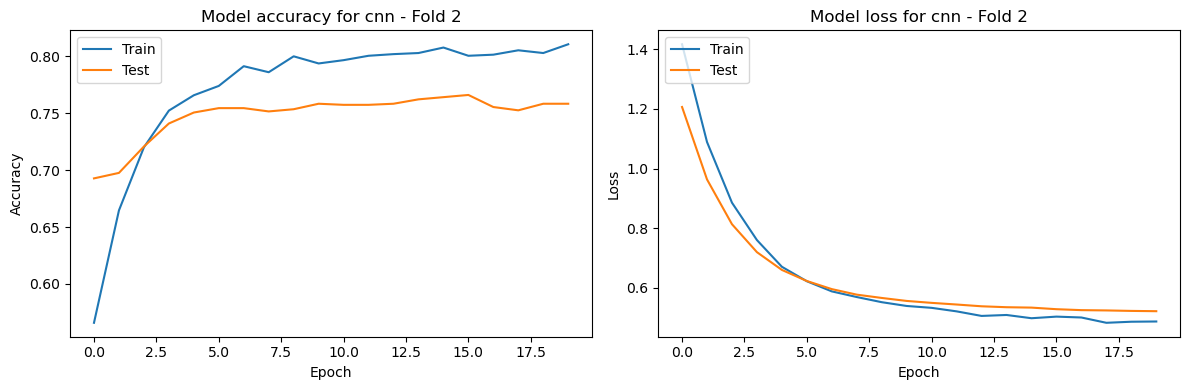

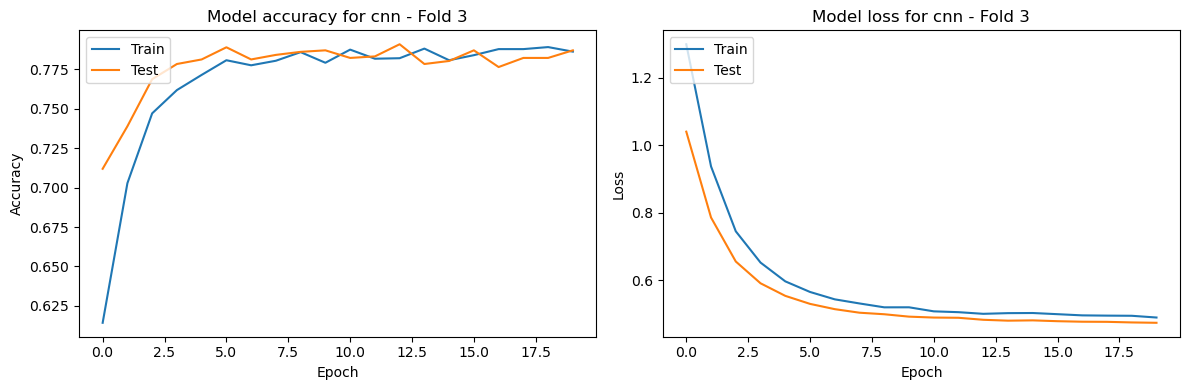

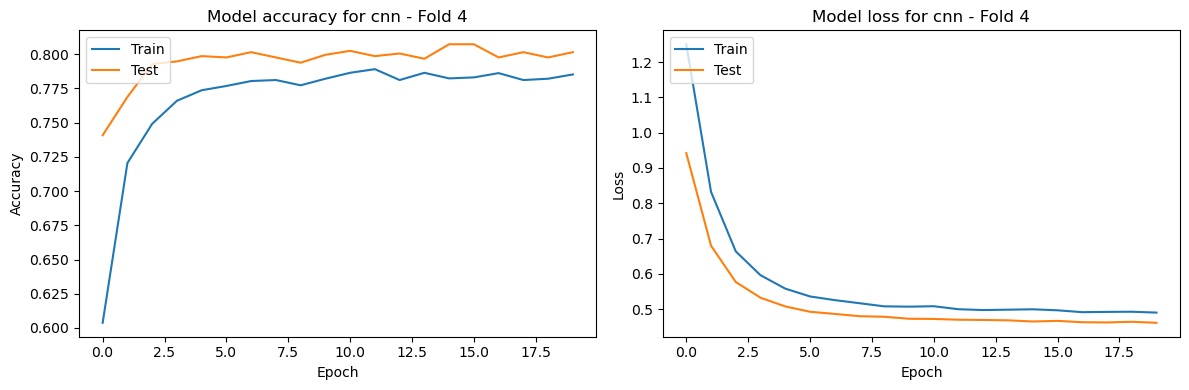

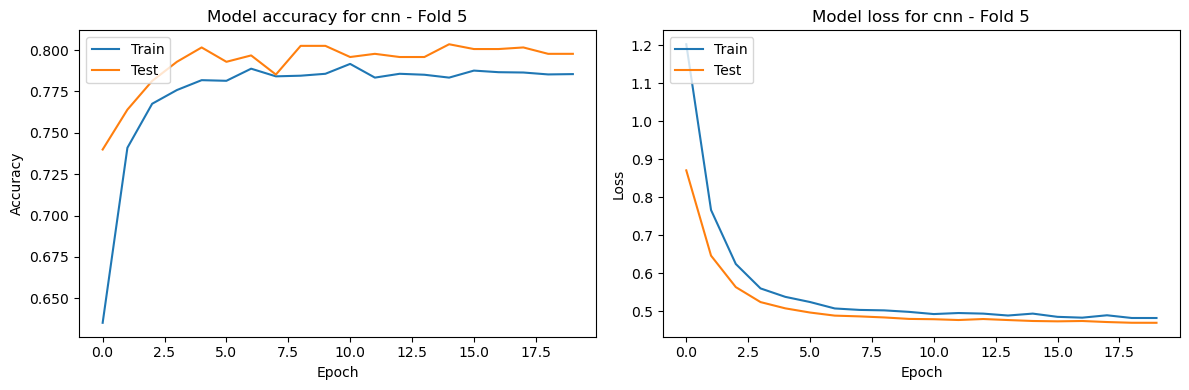

In [28]:
# Visualize the results for CNN model
predictor.visualize_training_results(history_list_mlp, 'cnn')

## Recommendation Systems 

In [29]:
# Team Composition Recommender Class
recommender = TeamCompositionRecommender(data)
recommender.agent_performance()

Map: Ascent
          rating         acs       kill     assist         adr
agent                                                         
reyna   1.327500  268.000000  24.750000   3.250000  171.750000
cypher  1.150625  224.937500  18.375000   6.875000  141.187500
fade    1.048182  187.181818  13.454545   8.363636  120.500000
jett    1.040964  225.682502  17.030151   3.557789  144.719768
kayo    1.039841  193.585434  13.937173  11.675393  125.105936


Map: Pearl
           rating         acs       kill    assist         adr
agent                                                         
sage     1.155000  210.000000  17.000000  4.000000  127.500000
neon     1.140000  286.000000  23.000000  5.000000  186.000000
cypher   1.107500  172.500000  13.250000  7.500000  120.000000
phoenix  1.084444  226.333333  16.944444  8.333333  150.444444
raze     1.077500  243.500000  17.750000  5.500000  163.250000


Map: Haven
         rating         acs       kill     assist         adr
agent             

C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.231476830956573


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.23481151484192175


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.25162175688789895


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.19982986720751378


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.1837377578761651


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.18837693789068644


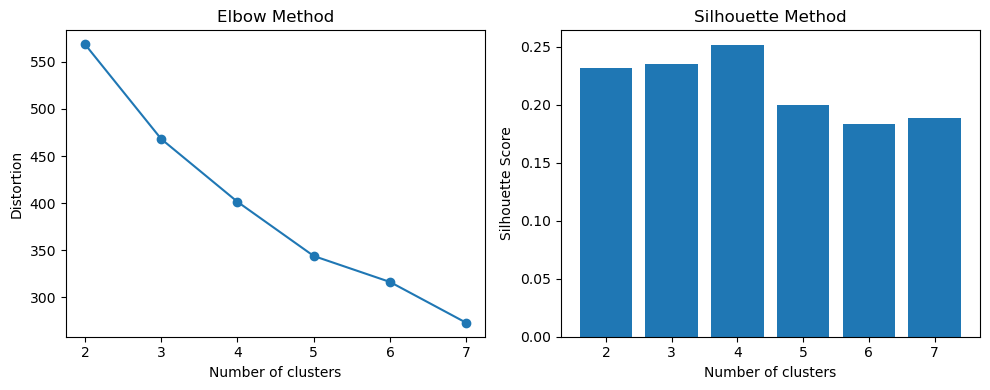

In [30]:
# Shows the number of clusters I should use (3) and evaluation accuracy of our clustering
recommender.plot_elbow_silhouette()

Map: Ascent


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
kayo       0.994737
omen       0.989474
jett       0.989474
sova       0.889474
killjoy    0.836842
fade       0.094737
cypher     0.078947
viper      0.052632
sage       0.031579
raze       0.015789
astra      0.010526
gekko      0.010526
skye       0.005263
phoenix    0.000000
reyna      0.000000
breach     0.000000
harbor     0.000000
cluster    0.000000
dtype: float64
Cluster 1:
cluster    1.00
viper      1.00
harbor     1.00
reyna      1.00
raze       1.00
skye       0.75
kayo       0.25
phoenix    0.00
sova       0.00
sage       0.00
astra      0.00
breach     0.00
killjoy    0.00
jett       0.00
gekko      0.00
fade       0.00
cypher     0.00
omen       0.00
dtype: float64
Cluster 2:
cluster    2.000000
omen       0.928571
killjoy    0.857143
jett       0.785714
skye       0.642857
viper      0.642857
fade       0.285714
breach     0.285714
phoenix    0.142857
cypher     0.071429
harbor     0.071429
kayo       0.071429
raze       0.071429
sova       0.071429
astra    

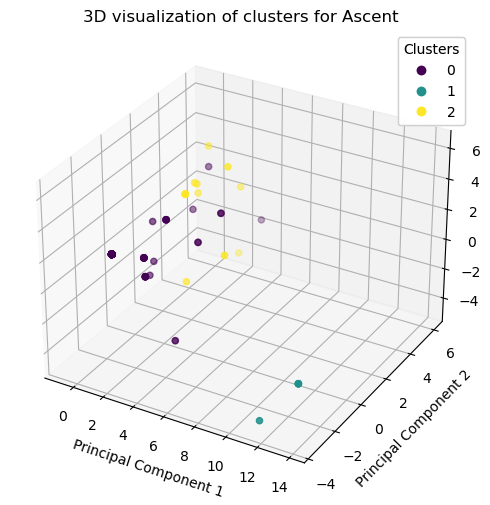

In [31]:
# Clustering for the Map 'Ascent'
recommender.cluster_teams('Ascent')

Map: Pearl


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
killjoy      0.979381
jett         0.958763
skye         0.948454
harbor       0.938144
viper        0.927835
astra        0.051546
kayo         0.051546
brimstone    0.041237
omen         0.030928
raze         0.030928
reyna        0.010309
neon         0.010309
breach       0.010309
fade         0.010309
phoenix      0.000000
gekko        0.000000
sage         0.000000
sova         0.000000
cypher       0.000000
yoru         0.000000
cluster      0.000000
dtype: float64
Cluster 1:
astra        1.000000
killjoy      1.000000
cluster      1.000000
skye         0.916667
phoenix      0.750000
jett         0.708333
harbor       0.208333
fade         0.125000
sage         0.083333
gekko        0.083333
breach       0.083333
omen         0.041667
yoru         0.000000
viper        0.000000
sova         0.000000
cypher       0.000000
reyna        0.000000
raze         0.000000
brimstone    0.000000
kayo         0.000000
neon         0.000000
dtype: float64
Cluster 2:
cluster      

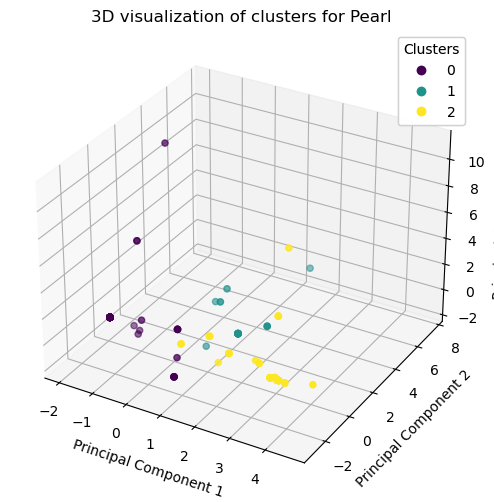

In [32]:
# Clustering for the Map 'Pearl'
recommender.cluster_teams('Pearl')

Map: Haven


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
jett       1.000000
breach     0.975806
killjoy    0.935484
sova       0.862903
omen       0.774194
astra      0.225806
gekko      0.104839
cypher     0.056452
skye       0.048387
phoenix    0.008065
chamber    0.008065
harbor     0.000000
kayo       0.000000
fade       0.000000
raze       0.000000
sage       0.000000
viper      0.000000
yoru       0.000000
cluster    0.000000
dtype: float64
Cluster 1:
killjoy    1.00000
jett       1.00000
skye       1.00000
cluster    1.00000
viper      0.87500
harbor     0.71875
omen       0.31250
kayo       0.09375
fade       0.00000
gekko      0.00000
cypher     0.00000
breach     0.00000
phoenix    0.00000
raze       0.00000
sage       0.00000
chamber    0.00000
sova       0.00000
yoru       0.00000
astra      0.00000
dtype: float64
Cluster 2:
cluster    2.000000
raze       1.000000
omen       0.863636
killjoy    0.863636
breach     0.772727
sova       0.590909
skye       0.272727
chamber    0.181818
astra      0.136364
fade       0.090

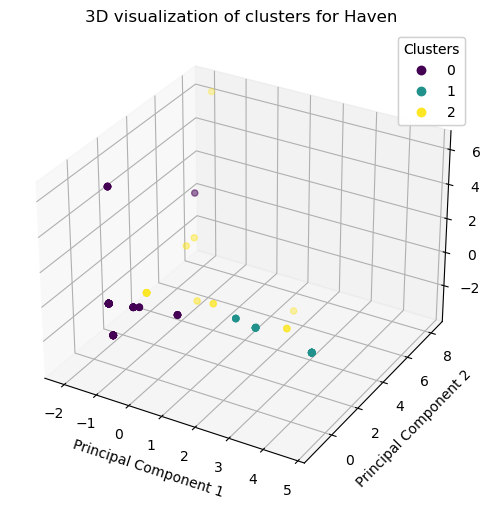

In [33]:
# Clustering for the Map 'Haven'
recommender.cluster_teams('Haven')

Map: Lotus


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
killjoy      0.959184
viper        0.959184
raze         0.938776
fade         0.877551
omen         0.591837
astra        0.408163
skye         0.122449
yoru         0.061224
breach       0.040816
jett         0.020408
reyna        0.020408
gekko        0.000000
harbor       0.000000
kayo         0.000000
neon         0.000000
cypher       0.000000
chamber      0.000000
sage         0.000000
sova         0.000000
brimstone    0.000000
cluster      0.000000
dtype: float64
Cluster 1:
cluster      1.000000
killjoy      0.914062
omen         0.906250
skye         0.750000
viper        0.656250
jett         0.437500
raze         0.304688
neon         0.281250
breach       0.242188
kayo         0.164062
sova         0.109375
harbor       0.101562
fade         0.046875
gekko        0.039062
sage         0.015625
astra        0.015625
chamber      0.015625
reyna        0.000000
cypher       0.000000
yoru         0.000000
brimstone    0.000000
dtype: float64
Cluster 2:
cluster      

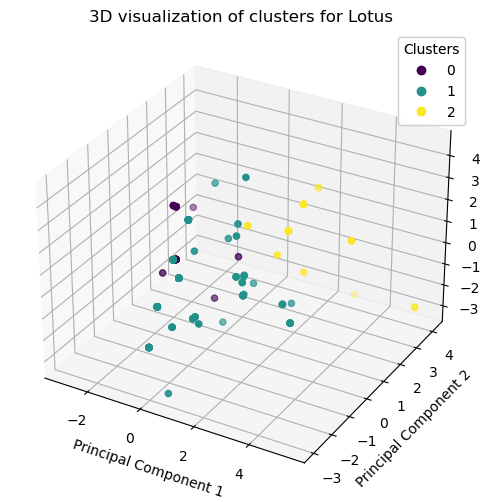

In [34]:
# Clustering for the Map 'Lotus'
recommender.cluster_teams('Lotus')

Map: Icebox


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
harbor     1.000000
killjoy    1.000000
viper      1.000000
jett       0.863636
sova       0.590909
skye       0.227273
kayo       0.136364
fade       0.090909
gekko      0.090909
cypher     0.000000
omen       0.000000
sage       0.000000
cluster    0.000000
dtype: float64
Cluster 1:
sova       1.000000
viper      1.000000
cluster    1.000000
killjoy    0.952381
sage       0.952381
jett       0.619048
kayo       0.238095
omen       0.190476
gekko      0.047619
cypher     0.000000
fade       0.000000
harbor     0.000000
skye       0.000000
dtype: float64
Cluster 2:
cluster    2.0
cypher     1.0
jett       1.0
kayo       1.0
sage       1.0
viper      1.0
fade       0.0
gekko      0.0
harbor     0.0
killjoy    0.0
omen       0.0
skye       0.0
sova       0.0
dtype: float64




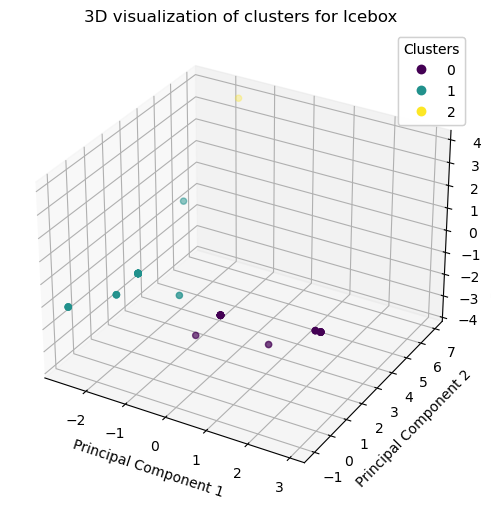

In [35]:
# Clustering for the Map 'Icebox'
recommender.cluster_teams('Icebox')

Map: Bind


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
skye         1.000000
raze         0.960784
brimstone    0.960784
viper        0.921569
chamber      0.333333
cypher       0.274510
yoru         0.117647
sage         0.098039
neon         0.078431
kayo         0.078431
sova         0.039216
reyna        0.039216
astra        0.039216
harbor       0.039216
breach       0.019608
omen         0.000000
jett         0.000000
gekko        0.000000
fade         0.000000
cluster      0.000000
dtype: float64
Cluster 1:
cluster      1.0000
raze         1.0000
viper        0.8750
omen         0.6875
fade         0.6250
skye         0.6250
brimstone    0.4375
kayo         0.2500
breach       0.1250
yoru         0.0625
reyna        0.0625
astra        0.0625
jett         0.0625
gekko        0.0625
chamber      0.0625
harbor       0.0000
sage         0.0000
sova         0.0000
cypher       0.0000
neon         0.0000
dtype: float64
Cluster 2:
cluster      2.000000
skye         1.000000
raze         0.836735
viper        0.795918
harbor   

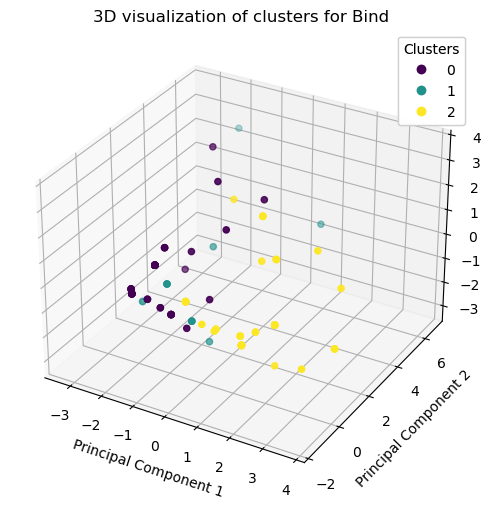

In [36]:
# Clustering for the Map 'Bind'
recommender.cluster_teams('Bind')

Map: Split


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
cypher     0.981132
raze       0.773585
omen       0.735849
skye       0.660377
breach     0.509434
sage       0.471698
jett       0.433962
astra      0.264151
gekko      0.056604
yoru       0.037736
fade       0.037736
viper      0.037736
neon       0.000000
reyna      0.000000
killjoy    0.000000
kayo       0.000000
chamber    0.000000
cluster    0.000000
dtype: float64
Cluster 1:
cluster    1.000000
skye       1.000000
astra      0.966667
viper      0.941667
raze       0.900000
jett       0.741667
kayo       0.166667
chamber    0.075000
cypher     0.066667
sage       0.058333
omen       0.033333
gekko      0.025000
breach     0.008333
reyna      0.008333
neon       0.008333
fade       0.000000
killjoy    0.000000
yoru       0.000000
dtype: float64
Cluster 2:
cluster    2.000000
killjoy    0.947368
skye       0.947368
raze       0.947368
astra      0.736842
breach     0.526316
viper      0.421053
omen       0.263158
kayo       0.052632
sage       0.052632
chamber    0.0526

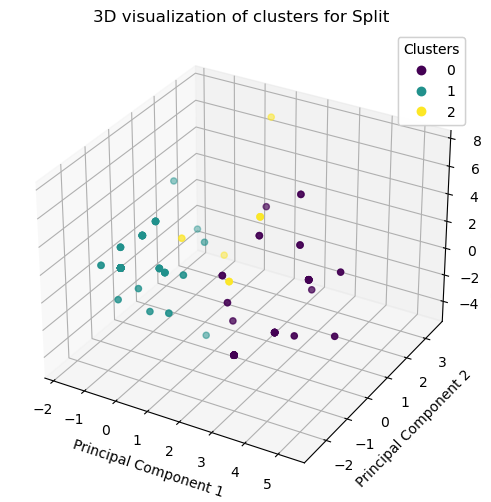

In [37]:
# Clustering for the Map 'Split'
recommender.cluster_teams('Split')

Map: Fracture


C:\Users\chill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
brimstone    0.989691
breach       0.979381
killjoy      0.969072
raze         0.762887
jett         0.360825
skye         0.247423
fade         0.237113
neon         0.195876
sova         0.164948
viper        0.041237
chamber      0.030928
kayo         0.020619
yoru         0.000000
astra        0.000000
omen         0.000000
cypher       0.000000
cluster      0.000000
dtype: float64
Cluster 1:
cluster      1.000000
viper        1.000000
omen         0.846154
raze         0.653846
breach       0.538462
kayo         0.500000
cypher       0.346154
fade         0.230769
skye         0.192308
neon         0.192308
yoru         0.153846
astra        0.153846
killjoy      0.115385
jett         0.038462
sova         0.038462
chamber      0.000000
brimstone    0.000000
dtype: float64
Cluster 2:
cluster      2.000000
brimstone    1.000000
cypher       1.000000
breach       0.956522
raze         0.826087
fade         0.521739
skye         0.260870
kayo         0.217391
neon         

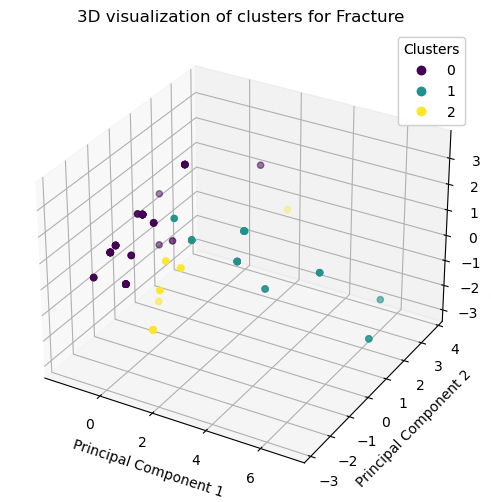

In [38]:
# Clustering for the Map 'Fracture'
recommender.cluster_teams('Fracture')